In [1]:
import pandas as pd

In [2]:
churn = pd.read_csv(r'D:\Mitsu\MS-ISM\508 - Data Mining I\Week4\DataSet\Telco-Customer-Churn-1.csv')

In [3]:
churn.shape

(7032, 20)

In [4]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
X = pd.get_dummies(churn.iloc[:, 0:19], drop_first = True)
y = churn.iloc[:, 19]

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder_churn = LabelEncoder()
y = labelencoder_churn.fit_transform(churn['Churn'].values)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
#Model Development and Prediction
from sklearn.linear_model import LogisticRegression

In [12]:
#instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 200)

#fit the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [13]:
#fit the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [14]:
coef = pd.DataFrame(logreg.coef_[0], index = X.columns, columns=['Coefficient'])
coef

,Coefficient
tenure,-0.061984
MonthlyCharges,0.005117
TotalCharges,0.000316
gender_Male,-0.003589
SeniorCitizen_yes,0.258947
Partner_Yes,0.033521
Dependents_Yes,-0.229826
PhoneService_Yes,-0.515961
MultipleLines_No phone service,0.283711
MultipleLines_Yes,0.246826


In [15]:
import numpy as np

In [16]:
df = pd.DataFrame(np.exp(logreg.coef_)[0], index = X_train.columns, columns=['Odds'])
df.sort_values(by=['Odds'], ascending=True)

,Odds
Contract_Two year,0.335267
Contract_One year,0.557975
PhoneService_Yes,0.596927
TechSupport_Yes,0.633224
OnlineSecurity_Yes,0.702766
PaymentMethod_Credit card (automatic),0.786538
Dependents_Yes,0.794672
OnlineBackup_Yes,0.812967
OnlineBackup_No internet service,0.923488
StreamingMovies_No internet service,0.923488


In [17]:
#Evaluate logistic regression model on the test set
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [18]:
import sklearn.metrics as metrics

In [19]:
print("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy::0.807


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

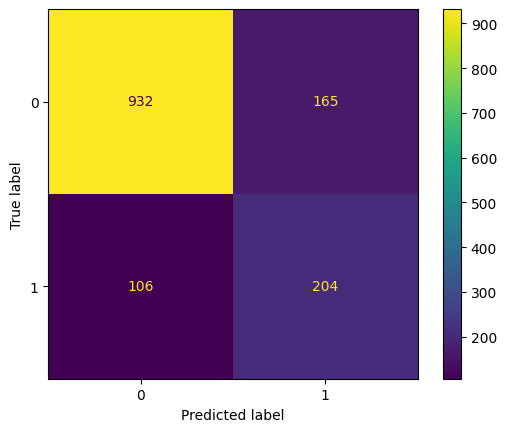

In [21]:
cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

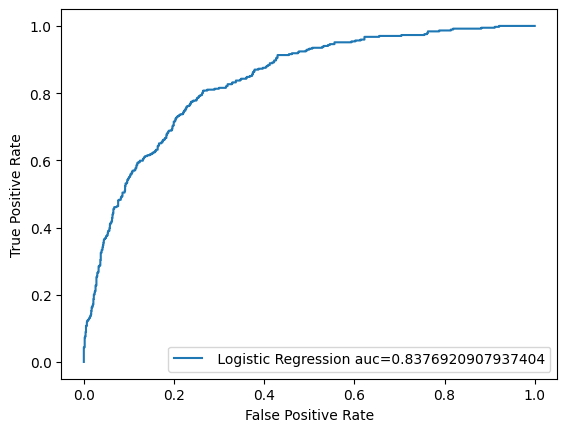

In [22]:
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#plt.legend(loc=4)
# show the legend
pyplot.legend()
pyplot.show()